In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customers_df= pd.read_csv('/home/dhirajpant/Suspicious Transaction Detection/data/raw/global_ime_bank_customers.csv')
transactions_df= pd.read_csv('/home/dhirajpant/Suspicious Transaction Detection/data/raw/global_ime_bank_transactions.csv')

In [3]:
customers_df.head()

,customer_id,age_group,home_location,credit_score,account_age_years,account_type,avg_monthly_income,mobile_banking_user,primary_device,primary_os,primary_browser,avg_transaction_amount,transaction_frequency,employment_status,preferred_transaction_types,international_activity,risk_score
0,GIME000001,26-35,Palpa,714,13,Savings,55580.825844,True,iPad,iOS,Samsung Internet,6498.703229,22,Self-employed,"['Loan Payment', 'Internet Bill Payment', 'Wat...",True,30
1,GIME000002,26-35,Kathmandu,607,7,Savings,34640.469961,True,Android Tablet,Android,Chrome,3946.766234,6,Employed,"['Loan Payment', 'Branch Deposit', 'QR Payment...",True,33
2,GIME000003,56-65,Mustang,589,10,Savings,37965.867755,True,Android Tablet,Android,Edge,13286.477126,27,Employed,"['Branch Deposit', 'Electricity Bill Payment',...",False,8
3,GIME000004,46-55,Biratnagar,609,8,Savings,22131.661183,True,iPhone,iOS,Safari,5199.307947,19,Self-employed,"['Insurance Premium Payment', 'Branch Withdraw...",False,18
4,GIME000005,26-35,Butwal,706,7,Current,107904.581207,True,iPhone,iOS,Chrome,19884.694305,26,Employed,"['Mobile Recharge', 'Internet Bill Payment', '...",True,33


In [4]:
transactions_df.head()

,transaction_id,customer_id,transaction_date,transaction_type,amount,location,ip_address,device,os,browser,...,credit_score,account_age_years,account_type,avg_monthly_income,mobile_banking_user,transaction_frequency,employment_status,international_activity,risk_score,is_suspicious
0,TXN20241124104326,GIME000727,11/24/2024 15:29,Inward Remittance,13925.72,Nawalparasi,103.92.86.139,NaN,NaN,NaN,...,673,1,Current,65911.89284,True,20,Employed,False,24,False
1,TXN20241204130277,GIME000539,12/4/2024 5:26,ATM Withdrawal,25037.35,Kaski,27.201.191.54,NaN,NaN,NaN,...,666,11,Current,75126.72458,True,3,Employed,False,19,False
2,TXN20240813940494,GIME000084,8/13/2024 22:42,Cheque Deposit,6677.66,Pokhara,27.231.166.66,NaN,NaN,NaN,...,474,5,Savings,33904.26167,True,14,Employed,False,42,False
3,TXN20240213270855,GIME000660,2/13/2024 10:51,School Fee Payment,16071.37,Biratnagar,43.122.204.45,NaN,NaN,NaN,...,680,6,Savings,51961.55841,False,8,Employed,False,26,False
4,TXN20240615309580,GIME000398,6/15/2024 9:41,POS Transaction,17196.84,Pokhara,103.67.183.49,NaN,NaN,NaN,...,582,9,Current,122082.36450,True,16,Self-employed,False,1,False


In [5]:
print(customers_df.shape)
print(transactions_df.shape)

(1000, 17)
(103500, 28)


In [6]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  1000 non-null   object 
 1   age_group                    1000 non-null   object 
 2   home_location                1000 non-null   object 
 3   credit_score                 1000 non-null   int64  
 4   account_age_years            1000 non-null   int64  
 5   account_type                 1000 non-null   object 
 6   avg_monthly_income           1000 non-null   float64
 7   mobile_banking_user          1000 non-null   bool   
 8   primary_device               864 non-null    object 
 9   primary_os                   864 non-null    object 
 10  primary_browser              864 non-null    object 
 11  avg_transaction_amount       1000 non-null   float64
 12  transaction_frequency        1000 non-null   int64  
 13  employment_status  

In [7]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103500 entries, 0 to 103499
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   transaction_id          103500 non-null  object 
 1   customer_id             103500 non-null  object 
 2   transaction_date        103500 non-null  object 
 3   transaction_type        103500 non-null  object 
 4   amount                  103500 non-null  float64
 5   location                103500 non-null  object 
 6   ip_address              103500 non-null  object 
 7   device                  23509 non-null   object 
 8   os                      23537 non-null   object 
 9   browser                 23533 non-null   object 
 10  attempt_sequence        103500 non-null  int64  
 11  time_of_day             103500 non-null  object 
 12  transaction_velocity    103500 non-null  int64  
 13  status                  103500 non-null  object 
 14  auth_method         

In [8]:
transactions_df.columns

Index(['transaction_id', 'customer_id', 'transaction_date', 'transaction_type',
       'amount', 'location', 'ip_address', 'device', 'os', 'browser',
       'attempt_sequence', 'time_of_day', 'transaction_velocity', 'status',
       'auth_method', 'amount_deviation', 'age_group', 'home_location',
       'credit_score', 'account_age_years', 'account_type',
       'avg_monthly_income', 'mobile_banking_user', 'transaction_frequency',
       'employment_status', 'international_activity', 'risk_score',
       'is_suspicious'],
      dtype='object')

In [9]:
customers_df.columns

Index(['customer_id', 'age_group', 'home_location', 'credit_score',
       'account_age_years', 'account_type', 'avg_monthly_income',
       'mobile_banking_user', 'primary_device', 'primary_os',
       'primary_browser', 'avg_transaction_amount', 'transaction_frequency',
       'employment_status', 'preferred_transaction_types',
       'international_activity', 'risk_score'],
      dtype='object')

In [10]:
# Merge both datasets on customer_id, suffixing overlapping columns
merged_df = pd.merge(transactions_df, customers_df, on='customer_id', how='left', suffixes=('', '_cust'))

# Loop over duplicate columns and fill only where original is missing, then drop the _cust version
for col in customers_df.columns:
    if col != 'customer_id' and col in transactions_df.columns:
        merged_df[col] = merged_df[col].combine_first(merged_df[col + '_cust'])
        merged_df.drop(columns=[col + '_cust'], inplace=True)



In [11]:
merged_df.head()

,transaction_id,customer_id,transaction_date,transaction_type,amount,location,ip_address,device,os,browser,...,transaction_frequency,employment_status,international_activity,risk_score,is_suspicious,primary_device,primary_os,primary_browser,avg_transaction_amount,preferred_transaction_types
0,TXN20241124104326,GIME000727,11/24/2024 15:29,Inward Remittance,13925.72,Nawalparasi,103.92.86.139,NaN,NaN,NaN,...,20,Employed,False,24,False,Android Tablet,Android,Chrome,22329.231810,"['Airline Ticket Payment', 'Inward Remittance'..."
1,TXN20241204130277,GIME000539,12/4/2024 5:26,ATM Withdrawal,25037.35,Kaski,27.201.191.54,NaN,NaN,NaN,...,3,Employed,False,19,False,Android Phone,Android,Edge,18046.656345,"['ATM Withdrawal', 'Wallet Load - Khalti', 'Ou..."
2,TXN20240813940494,GIME000084,8/13/2024 22:42,Cheque Deposit,6677.66,Pokhara,27.231.166.66,NaN,NaN,NaN,...,14,Employed,False,42,False,Android Tablet,Android,Safari,5766.515662,"['Mobile Recharge', 'Mobile Banking Transfer',..."
3,TXN20240213270855,GIME000660,2/13/2024 10:51,School Fee Payment,16071.37,Biratnagar,43.122.204.45,NaN,NaN,NaN,...,8,Employed,False,26,False,NaN,NaN,NaN,18234.104335,"['POS Transaction', 'Cheque Payment', 'Loan Pa..."
4,TXN20240615309580,GIME000398,6/15/2024 9:41,POS Transaction,17196.84,Pokhara,103.67.183.49,NaN,NaN,NaN,...,16,Self-employed,False,1,False,Android Phone,Android,Brave,17355.734161,"['Airline Ticket Payment', 'POS Transaction', ..."


In [12]:
print(merged_df.shape)
merged_df.info()
merged_df.isnull().sum().sort_values(ascending=False)


(103500, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103500 entries, 0 to 103499
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   transaction_id               103500 non-null  object 
 1   customer_id                  103500 non-null  object 
 2   transaction_date             103500 non-null  object 
 3   transaction_type             103500 non-null  object 
 4   amount                       103500 non-null  float64
 5   location                     103500 non-null  object 
 6   ip_address                   103500 non-null  object 
 7   device                       23509 non-null   object 
 8   os                           23537 non-null   object 
 9   browser                      23533 non-null   object 
 10  attempt_sequence             103500 non-null  int64  
 11  time_of_day                  103500 non-null  object 
 12  transaction_velocity         103500 non-null 

device                         79991
browser                        79967
os                             79963
primary_browser                14202
primary_os                     14202
primary_device                 14202
transaction_id                     0
amount                             0
customer_id                        0
location                           0
attempt_sequence                   0
time_of_day                        0
transaction_velocity               0
status                             0
transaction_type                   0
ip_address                         0
transaction_date                   0
age_group                          0
amount_deviation                   0
auth_method                        0
home_location                      0
avg_monthly_income                 0
credit_score                       0
account_age_years                  0
account_type                       0
employment_status                  0
transaction_frequency              0
m

In [13]:
merged_df['device'] = merged_df['device'].fillna('unknown')
merged_df['primary_device'] = merged_df['primary_device'].fillna('notknown')

merged_df['os'] = merged_df['os'].fillna('unknown')
merged_df['primary_os'] = merged_df['primary_os'].fillna('notknown')

merged_df['browser'] = merged_df['browser'].fillna('unknown')
merged_df['primary_browser'] = merged_df['primary_browser'].fillna('notknown')

merged_df['location'] = merged_df['location'].fillna('unknown')
merged_df['home_location'] = merged_df['home_location'].fillna('notknown')


In [14]:
# Create new boolean features
merged_df['is_primary_device_used'] = merged_df['device'] == merged_df['primary_device']
merged_df['is_primary_os_used'] = merged_df['os'] == merged_df['primary_os']
merged_df['is_primary_browser_used'] = merged_df['browser'] == merged_df['primary_browser']
merged_df['is_transaction_from_home_location'] = merged_df['location'] == merged_df['home_location']

In [15]:
features_to_check = [
    'is_transaction_from_home_location',
    'is_primary_device_used',
    'is_primary_os_used',
    'is_primary_browser_used'
]
merged_df['is_usual_environment_used'] = (
    merged_df['is_primary_browser_used'] &
    merged_df['is_primary_device_used'] &
    merged_df['is_primary_os_used']
)

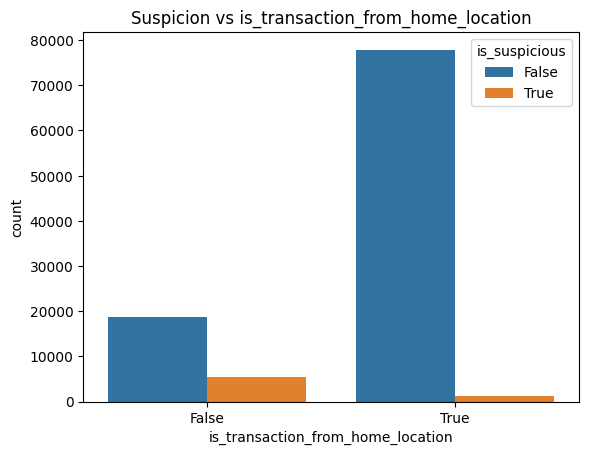

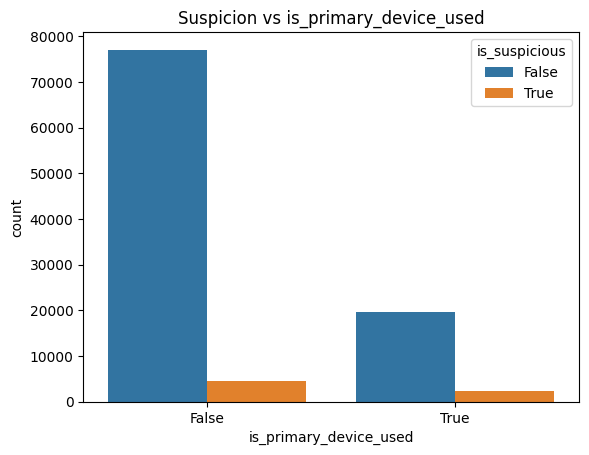

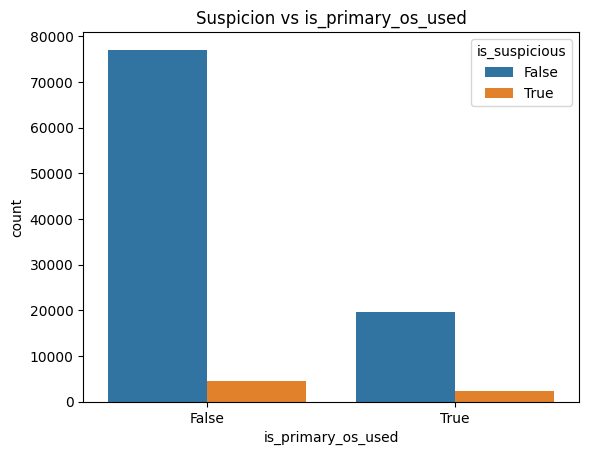

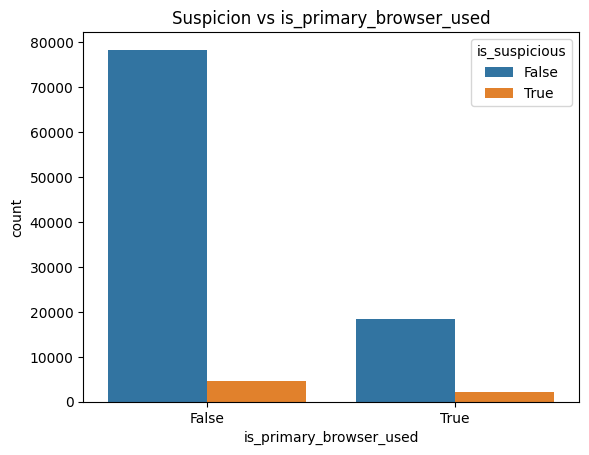

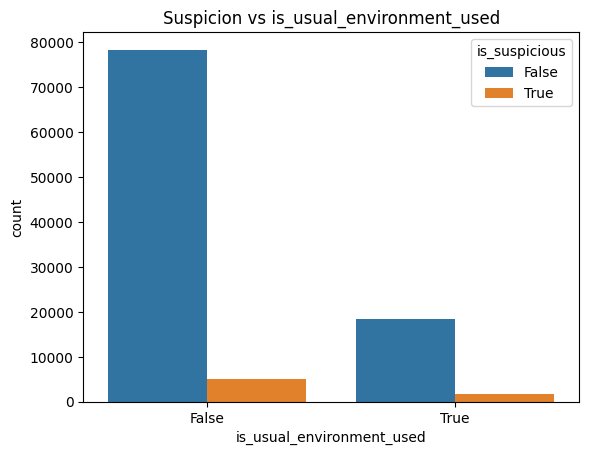

In [16]:
for feature in features_to_check + ['is_usual_environment_used']:
    sns.countplot(data=merged_df, x=feature, hue='is_suspicious')
    plt.title(f'Suspicion vs {feature}')
    plt.show()

In [17]:
merged_df.head()

,transaction_id,customer_id,transaction_date,transaction_type,amount,location,ip_address,device,os,browser,...,primary_device,primary_os,primary_browser,avg_transaction_amount,preferred_transaction_types,is_primary_device_used,is_primary_os_used,is_primary_browser_used,is_transaction_from_home_location,is_usual_environment_used
0,TXN20241124104326,GIME000727,11/24/2024 15:29,Inward Remittance,13925.72,Nawalparasi,103.92.86.139,unknown,unknown,unknown,...,Android Tablet,Android,Chrome,22329.231810,"['Airline Ticket Payment', 'Inward Remittance'...",False,False,False,True,False
1,TXN20241204130277,GIME000539,12/4/2024 5:26,ATM Withdrawal,25037.35,Kaski,27.201.191.54,unknown,unknown,unknown,...,Android Phone,Android,Edge,18046.656345,"['ATM Withdrawal', 'Wallet Load - Khalti', 'Ou...",False,False,False,True,False
2,TXN20240813940494,GIME000084,8/13/2024 22:42,Cheque Deposit,6677.66,Pokhara,27.231.166.66,unknown,unknown,unknown,...,Android Tablet,Android,Safari,5766.515662,"['Mobile Recharge', 'Mobile Banking Transfer',...",False,False,False,True,False
3,TXN20240213270855,GIME000660,2/13/2024 10:51,School Fee Payment,16071.37,Biratnagar,43.122.204.45,unknown,unknown,unknown,...,notknown,notknown,notknown,18234.104335,"['POS Transaction', 'Cheque Payment', 'Loan Pa...",False,False,False,True,False
4,TXN20240615309580,GIME000398,6/15/2024 9:41,POS Transaction,17196.84,Pokhara,103.67.183.49,unknown,unknown,unknown,...,Android Phone,Android,Brave,17355.734161,"['Airline Ticket Payment', 'POS Transaction', ...",False,False,False,True,False


In [18]:
merged_df.isnull().sum().sort_values(ascending=False)

transaction_id                       0
customer_id                          0
transaction_date                     0
transaction_type                     0
amount                               0
location                             0
ip_address                           0
device                               0
os                                   0
browser                              0
attempt_sequence                     0
time_of_day                          0
transaction_velocity                 0
status                               0
auth_method                          0
amount_deviation                     0
age_group                            0
home_location                        0
credit_score                         0
account_age_years                    0
account_type                         0
avg_monthly_income                   0
mobile_banking_user                  0
transaction_frequency                0
employment_status                    0
international_activity   

In [19]:
merged_df.duplicated().sum()

np.int64(0)

In [20]:
import ast

# Ensure that the preferred_transaction_types column is properly converted to a list
merged_df['preferred_transaction_types'] = merged_df['preferred_transaction_types'].apply(ast.literal_eval)

# Now check if the conversion worked
print(merged_df[['preferred_transaction_types']].head())


merged_df['is_preferred_transaction'] = merged_df.apply(
    lambda row: row['transaction_type'] in row['preferred_transaction_types'], axis=1
)

                         preferred_transaction_types
0  [Airline Ticket Payment, Inward Remittance, Wa...
1  [ATM Withdrawal, Wallet Load - Khalti, Outward...
2  [Mobile Recharge, Mobile Banking Transfer, Hot...
3  [POS Transaction, Cheque Payment, Loan Payment...
4  [Airline Ticket Payment, POS Transaction, Scho...


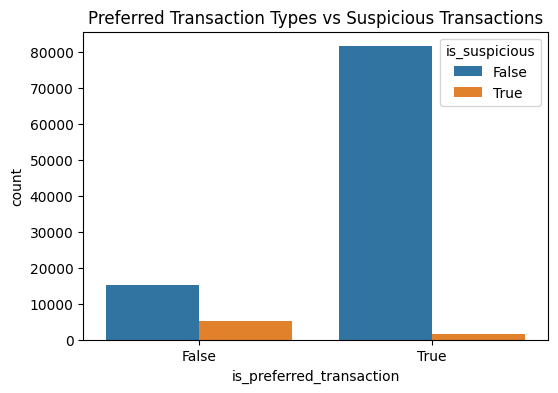

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x='is_preferred_transaction', hue='is_suspicious')
plt.title('Preferred Transaction Types vs Suspicious Transactions')
plt.show()


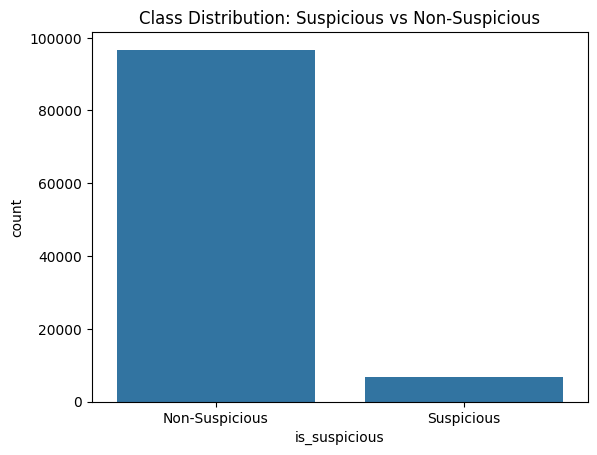

Suspicious transaction rate: 6.53%


In [22]:
sns.countplot(data=merged_df, x='is_suspicious')
plt.title("Class Distribution: Suspicious vs Non-Suspicious")
plt.xticks([0, 1], ['Non-Suspicious', 'Suspicious'])
plt.show()

print("Suspicious transaction rate: {:.2f}%".format(
    merged_df['is_suspicious'].mean() * 100))


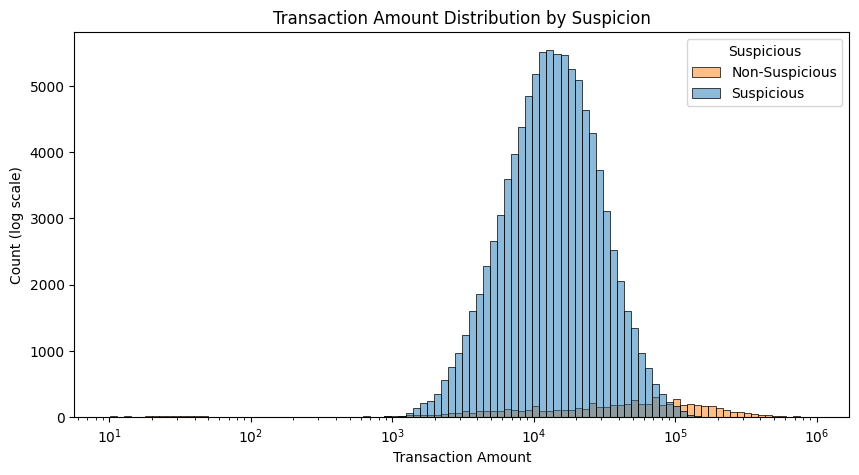

In [23]:
plt.figure(figsize=(10, 5))
sns.histplot(data=merged_df, x='amount', bins=100, hue='is_suspicious', log_scale=True)
plt.title("Transaction Amount Distribution by Suspicion")
plt.xlabel("Transaction Amount")
plt.ylabel("Count (log scale)")
plt.legend(title='Suspicious', labels=['Non-Suspicious', 'Suspicious'])
plt.show()

In [24]:
import ipaddress

def get_ip_category_and_class(ip):
    try:
        ip_obj = ipaddress.ip_address(ip)
        ip_type = "Private" if ip_obj.is_private else "Public"
        
        # Get first octet
        first_octet = int(ip.split('.')[0])

        # Determine IP class
        if 1 <= first_octet <= 126:
            ip_class = "A"
        elif 128 <= first_octet <= 191:
            ip_class = "B"
        elif 192 <= first_octet <= 223:
            ip_class = "C"
        elif 224 <= first_octet <= 239:
            ip_class = "D"
        elif 240 <= first_octet <= 254:
            ip_class = "E"
        else:
            ip_class = "Unknown"
        
        return pd.Series([ip_type, ip_class])
    
    except:
        return pd.Series(["Invalid", "Invalid"])

# Apply to your DataFrame (assuming 'ip_address' column exists)
merged_df[['ip_category', 'ip_class']] = merged_df['ip_address'].apply(get_ip_category_and_class)


In [25]:
merged_df.head()

,transaction_id,customer_id,transaction_date,transaction_type,amount,location,ip_address,device,os,browser,...,avg_transaction_amount,preferred_transaction_types,is_primary_device_used,is_primary_os_used,is_primary_browser_used,is_transaction_from_home_location,is_usual_environment_used,is_preferred_transaction,ip_category,ip_class
0,TXN20241124104326,GIME000727,11/24/2024 15:29,Inward Remittance,13925.72,Nawalparasi,103.92.86.139,unknown,unknown,unknown,...,22329.231810,"[Airline Ticket Payment, Inward Remittance, Wa...",False,False,False,True,False,True,Public,A
1,TXN20241204130277,GIME000539,12/4/2024 5:26,ATM Withdrawal,25037.35,Kaski,27.201.191.54,unknown,unknown,unknown,...,18046.656345,"[ATM Withdrawal, Wallet Load - Khalti, Outward...",False,False,False,True,False,True,Public,A
2,TXN20240813940494,GIME000084,8/13/2024 22:42,Cheque Deposit,6677.66,Pokhara,27.231.166.66,unknown,unknown,unknown,...,5766.515662,"[Mobile Recharge, Mobile Banking Transfer, Hot...",False,False,False,True,False,False,Public,A
3,TXN20240213270855,GIME000660,2/13/2024 10:51,School Fee Payment,16071.37,Biratnagar,43.122.204.45,unknown,unknown,unknown,...,18234.104335,"[POS Transaction, Cheque Payment, Loan Payment...",False,False,False,True,False,True,Public,A
4,TXN20240615309580,GIME000398,6/15/2024 9:41,POS Transaction,17196.84,Pokhara,103.67.183.49,unknown,unknown,unknown,...,17355.734161,"[Airline Ticket Payment, POS Transaction, Scho...",False,False,False,True,False,True,Public,A


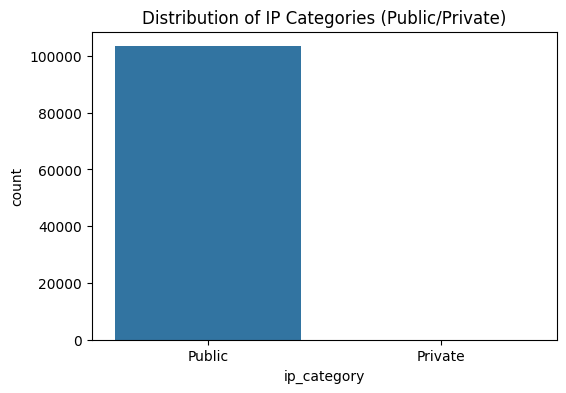

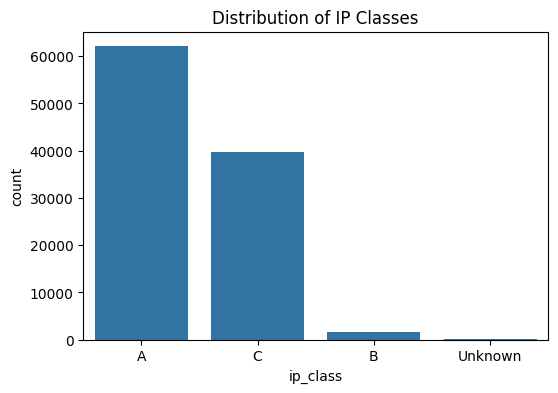

In [26]:
# Plot distribution of 'ip_category' (Public/Private)
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x='ip_category')
plt.title('Distribution of IP Categories (Public/Private)')
plt.show()

# Plot distribution of 'ip_class' (A/B/C/D/E)
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x='ip_class')
plt.title('Distribution of IP Classes')
plt.show()


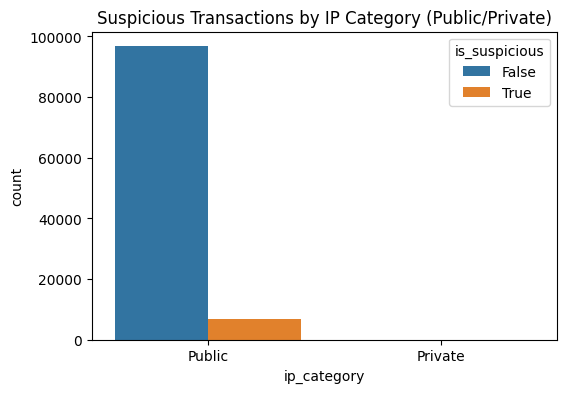

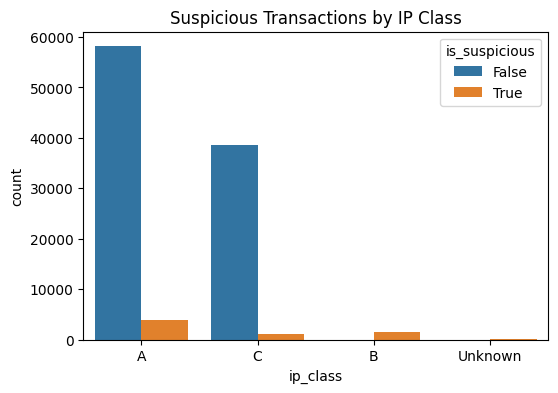

In [27]:
# Visualizing suspicious transaction rates for IP Category (Public vs Private)
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x='ip_category', hue='is_suspicious')
plt.title('Suspicious Transactions by IP Category (Public/Private)')
plt.show()

# Visualizing suspicious transaction rates for IP Class
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x='ip_class', hue='is_suspicious')
plt.title('Suspicious Transactions by IP Class')
plt.show()


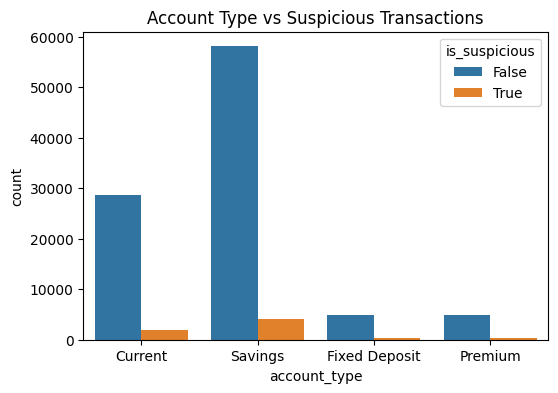

In [ ]:
# Visualizing suspicious transaction rates for account type
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x='account_type', hue='is_suspicious')
plt.title('Account Type vs Suspicious Transactions')
plt.show()


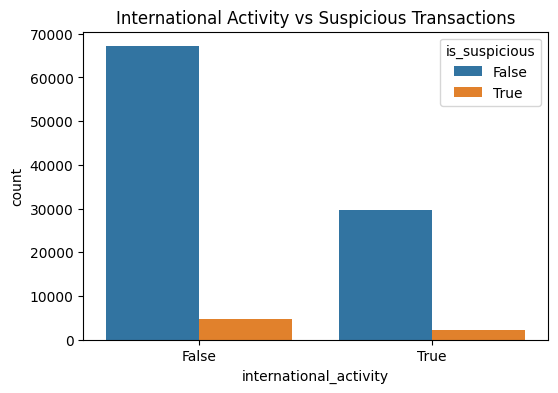

In [ ]:
# Visualizing suspicious transaction rates for International Activity
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x='international_activity', hue='is_suspicious')
plt.title('International Activity vs Suspicious Transactions')
plt.show()


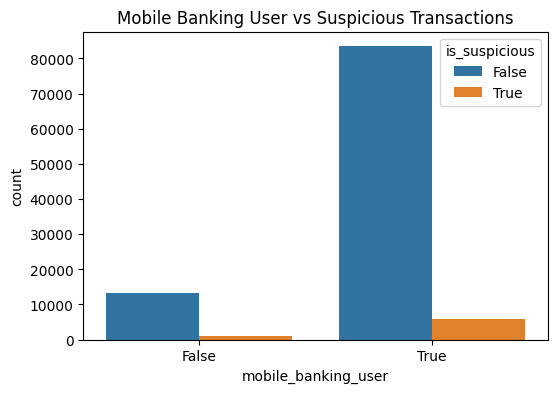

In [ ]:
# Visualizing suspicious transaction rates for mobile banking users
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x='mobile_banking_user', hue='is_suspicious')
plt.title('Mobile Banking User vs Suspicious Transactions')
plt.show()

In [31]:
merged_df.columns

Index(['transaction_id', 'customer_id', 'transaction_date', 'transaction_type',
       'amount', 'location', 'ip_address', 'device', 'os', 'browser',
       'attempt_sequence', 'time_of_day', 'transaction_velocity', 'status',
       'auth_method', 'amount_deviation', 'age_group', 'home_location',
       'credit_score', 'account_age_years', 'account_type',
       'avg_monthly_income', 'mobile_banking_user', 'transaction_frequency',
       'employment_status', 'international_activity', 'risk_score',
       'is_suspicious', 'primary_device', 'primary_os', 'primary_browser',
       'avg_transaction_amount', 'preferred_transaction_types',
       'is_primary_device_used', 'is_primary_os_used',
       'is_primary_browser_used', 'is_transaction_from_home_location',
       'is_usual_environment_used', 'is_preferred_transaction', 'ip_category',
       'ip_class'],
      dtype='object')